In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cel
Zbudowanie modelu klasyfikującego skoliozę - jako tako udany

# Ładowanie Danych

In [6]:
import os
import cv2
import scripts.image_label_loader as iml

data_dir = '../Datasets/X-Ray/scoliosis'
train_images, train_labels = iml.load_images_and_labels(data_dir, 'train')
valid_images, valid_labels = iml.load_images_and_labels(data_dir, 'valid')
test_images, test_labels = iml.load_images_and_labels(data_dir, 'test')

print(f'Train images: {len(train_images)}, Train labels: {len(train_labels)}')
print(f'Train shape {train_images[0].shape}')
print(f'Valid images: {len(valid_images)}, Valid labels: {len(valid_labels)}')
print(f'Test images: {len(test_images)}, Test labels: {len(test_labels)}')

train_images = np.array(train_images).astype(np.float32)
train_labels = np.array(train_labels).astype(np.float32)
test_images = np.array(test_images).astype(np.float32)
test_labels = np.array(test_labels).astype(np.float32)
valid_images = np.array(valid_images).astype(np.float32)
valid_labels = np.array(valid_labels).astype(np.float32)

train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

Train images: 862, Train labels: 862
Train shape (120, 60, 3)
Valid images: 100, Valid labels: 100
Test images: 100, Test labels: 100


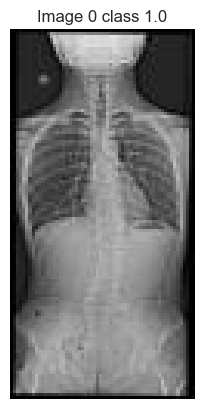

In [7]:
for i in range(0, 1):
    plt.imshow(train_images[i])
    plt.title(f'Image {i} class {train_labels[i]}') 
    plt.axis('off')  
    plt.show()  

# Tworzenie Modelu

In [8]:
import tensorflow
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [9]:
model = Sequential([
    Conv2D(120, (3, 3), activation='relu', input_shape=(120, 60, 3)),  # Użycie 3 kanałów
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(48, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 545ms/step - accuracy: 0.7648 - loss: 0.4355 - val_accuracy: 0.8800 - val_loss: 0.2294
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 564ms/step - accuracy: 0.8592 - loss: 0.2693 - val_accuracy: 0.8800 - val_loss: 0.2034
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 768ms/step - accuracy: 0.8847 - loss: 0.2827 - val_accuracy: 0.9300 - val_loss: 0.1874
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 594ms/step - accuracy: 0.9236 - loss: 0.2517 - val_accuracy: 0.9300 - val_loss: 0.1799
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 595ms/step - accuracy: 0.9160 - loss: 0.2445 - val_accuracy: 0.9600 - val_loss: 0.1765
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 596ms/step - accuracy: 0.9438 - loss: 0.2004 - val_accuracy: 0.8900 - val_loss: 0.1771
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 831ms/step - accuracy: 0.9134 - loss: 0.2243 - val_accuracy: 0.9600 - val_loss: 0.1594
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 625ms/step - accuracy: 0.9335 - loss: 0.1896 - val_accu

# Statystyki Uczenia

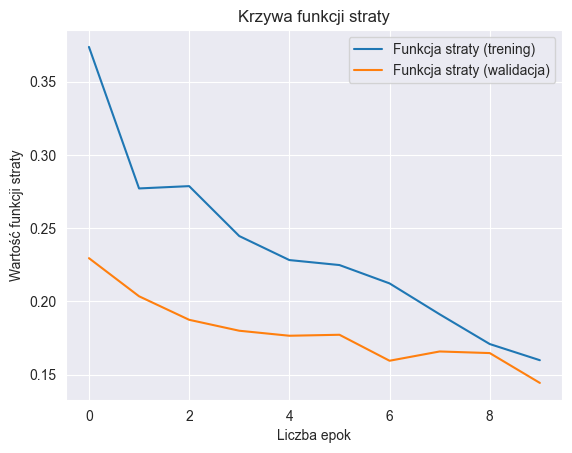

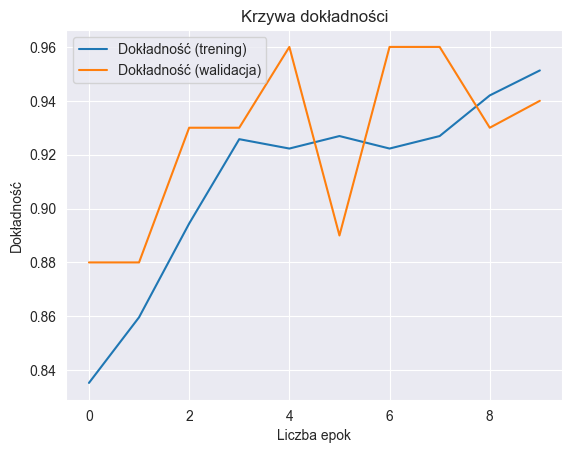

In [11]:
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [12]:
print(f"Wymiary testowych danych: {test_images.shape}\n")
pred_label = model.predict(test_images)
print(f"Dane odpowiedzi prosto z modelu: {pred_label}\n")
pred_label = np.where(pred_label > 0.5, 1, 0)
print(f"Dane po konwersji: {pred_label}\n")

Wymiary testowych danych: (100, 120, 60, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
Dane odpowiedzi prosto z modelu: [[0.96335703]
 [0.9788389 ]
 [0.9816773 ]
 [0.9881035 ]
 [0.9901743 ]
 [0.99757636]
 [0.9996627 ]
 [0.9573199 ]
 [0.98626804]
 [0.9984328 ]
 [0.99966735]
 [0.9970676 ]
 [0.98926365]
 [0.9531544 ]
 [0.8238907 ]
 [0.999505  ]
 [0.9945738 ]
 [0.9676678 ]
 [0.9989713 ]
 [0.99809396]
 [0.84325325]
 [0.97377187]
 [0.9976687 ]
 [0.9988606 ]
 [0.9990991 ]
 [0.9079513 ]
 [0.97229314]
 [0.9637637 ]
 [0.9977867 ]
 [0.99932486]
 [0.9984212 ]
 [0.99878913]
 [0.9895859 ]
 [0.99989533]
 [0.9981741 ]
 [0.9985612 ]
 [0.47341412]
 [0.47268206]
 [0.4869995 ]
 [0.48235175]
 [0.5019535 ]
 [0.47268206]
 [0.47268206]
 [0.47268206]
 [0.47268206]
 [0.4864283 ]
 [0.72984934]
 [0.47268206]
 [0.47268206]
 [0.47268206]
 [0.47268206]
 [0.47268206]
 [0.47286275]
 [0.47268206]
 [0.47419137]
 [0.47268206]
 [0.47268206]
 [0.6067065 ]
 [0.4975708 ]
 [0.47956902]
 [0.6818013 ]
 [0.5172437 ]
 [0.5172437 ]
 [

[23 66]


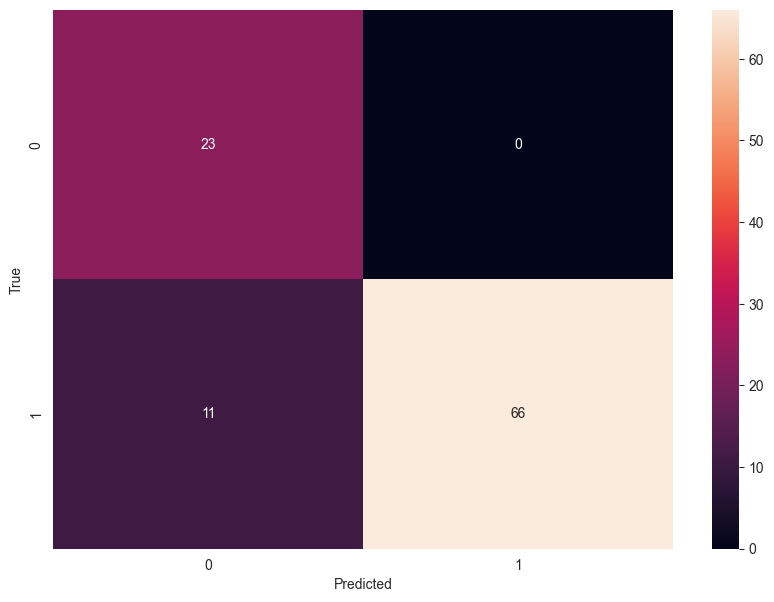

In [13]:
# Obliczenie confusion matrix
cm = confusion_matrix(pred_label, test_labels)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(2)], columns = [i for i in range(2)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# sprawdzenie dla zdjęcia spoza datasetu skoliozy
img = cv2.imread("../Datasets/Normal/scoliosis/test/images/IMG_1318-1-_JPG.rf.d3889d8b37ebafaf231aef879b4a6e9c.jpg")
print(img)
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

[[[211 207 218]
  [210 207 216]
  [210 207 216]
  ...
  [207 209 210]
  [212 209 211]
  [219 217 217]]

 [[211 207 218]
  [210 207 216]
  [210 208 214]
  ...
  [207 209 210]
  [210 210 210]
  [219 217 217]]

 [[211 208 217]
  [210 207 216]
  [210 208 214]
  ...
  [207 209 210]
  [210 210 210]
  [217 217 217]]

 ...

 [[177 184 177]
  [177 184 181]
  [170 174 179]
  ...
  [178 183 182]
  [183 187 181]
  [191 196 187]]

 [[175 183 173]
  [176 183 178]
  [178 183 186]
  ...
  [177 182 181]
  [182 186 180]
  [191 196 187]]

 [[174 182 172]
  [176 183 178]
  [182 187 190]
  ...
  [177 182 181]
  [182 186 180]
  [190 195 186]]]


(1, 120, 60, 3)

In [26]:
prot_lab = model.predict(my_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [27]:
prot_lab

array([[0.9085242]], dtype=float32)

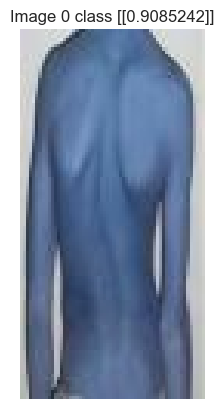

In [28]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  

In [29]:
# sprawdzenie dla zdjęcia spoza datasetu zdrowego
img = cv2.imread('Datasets/X-Ray/scoliosis/new_images/healthy.jpg')
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

(1,)

In [30]:
prot_lab = model.predict(my_img)
prot_lab

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

TypeError: Invalid shape () for image data

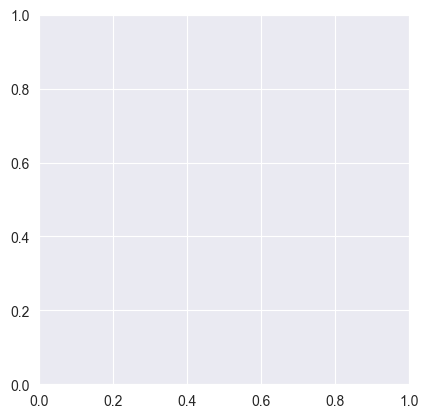

In [31]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  